### FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
import warnings
warnings. filterwarnings('ignore')

In [99]:
df=pd.read_csv("exchange_rate.csv")

In [101]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [103]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [105]:
df.shape

(7588, 2)

In [107]:
#checks for missing values 
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [109]:
df.duplicated().sum()

0

In [111]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [113]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


### Data Preprocessing

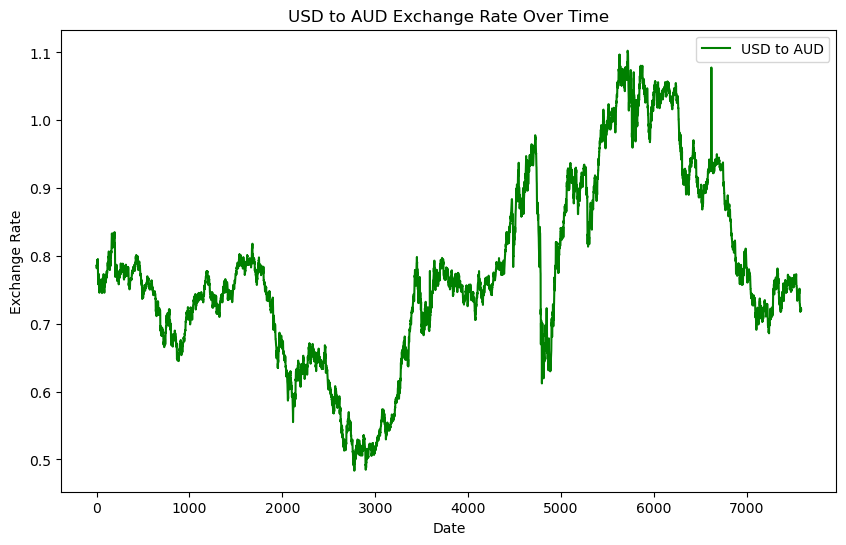

In [208]:
# Plot the time series for USD to AUD exchange rate

plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD',color='green')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [117]:
# Check for missing values
print(df.isna().sum())

date       0
Ex_rate    0
dtype: int64


### Model Building - ARIMA

In [121]:
#step 1: Parameter Selection for ARIMA

In [123]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.tsa.api as smt

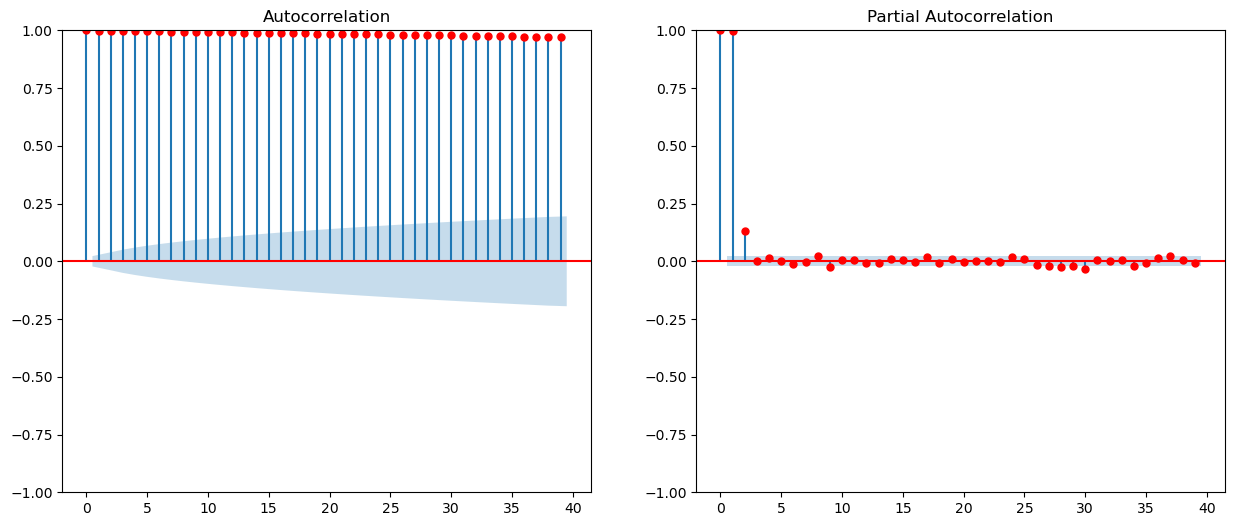

In [212]:
# Plot ACF and PACF

fig,axes = plt.subplots(1, 2, figsize=(15, 6))
smt.graphics.plot_acf(df['Ex_rate'], ax=axes[0],color='red')
smt.graphics.plot_pacf(df['Ex_rate'], ax=axes[1],color='red')
plt.show()

In [126]:
#step 2: Model Fitting:

In [127]:
from statsmodels.tsa.arima.model import ARIMA

In [129]:
p,d,q=1,1,1
model = ARIMA(df['Ex_rate'], order=(p, d, q))

In [133]:
model_fit = model.fit()

In [134]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 11 Feb 2025   AIC                         -56102.322
Time:                        23:47:06   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

In [135]:
#step 3: Diagnostics: 

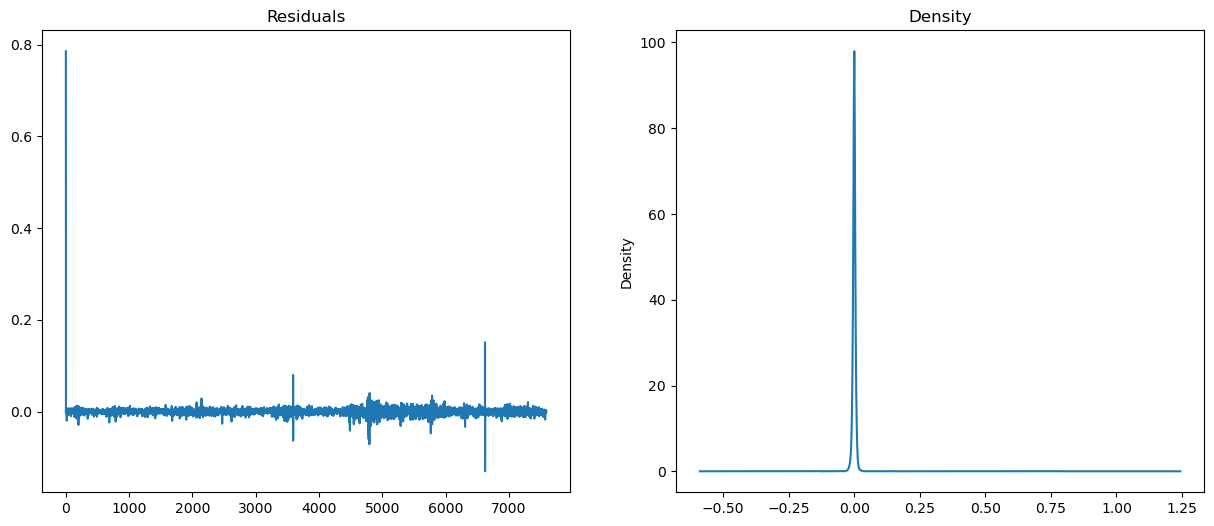

In [136]:
# Plot residuals
residuals = model_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [137]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [138]:
ljungbox_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljungbox_test)

    lb_stat  lb_pvalue
10  1.81673   0.997562


In [139]:
# Forecast future values
forecast = model_fit.get_forecast(steps=10)
forecast_index = pd.date_range(start=df.index[-1], periods=10, freq='D')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

In [140]:
print(forecast)

In [141]:
print(forecast_values)

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
Name: predicted_mean, dtype: float64


In [142]:
print(conf_int)

      lower Ex_rate  upper Ex_rate
7588       0.709074       0.732579
7589       0.705259       0.736393
7590       0.702103       0.739550
7591       0.699418       0.742234
7592       0.697033       0.744619
7593       0.694867       0.746786
7594       0.692868       0.748785
7595       0.691003       0.750650
7596       0.689247       0.752405
7597       0.687584       0.754068


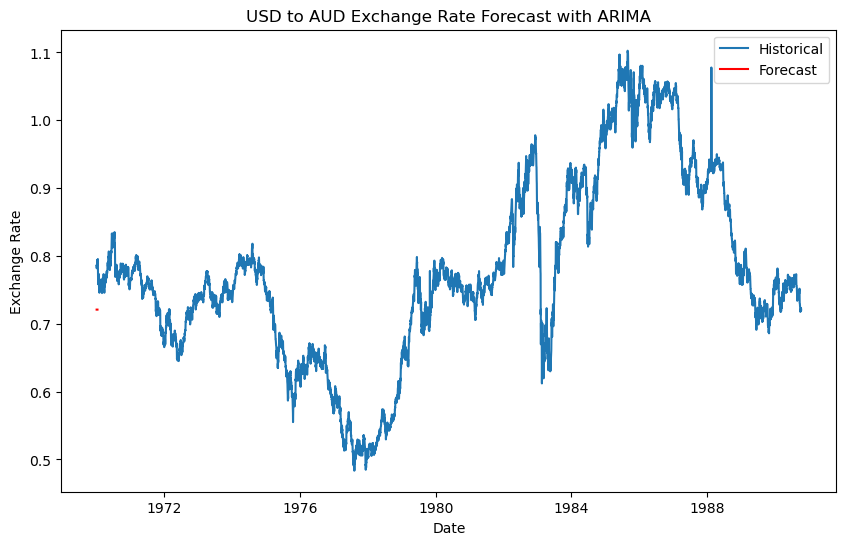

In [144]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('USD to AUD Exchange Rate Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Model Building - Exponential Smoothing

In [148]:
#Step 1: Model Selection

In [149]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [150]:
# Fit Holt's Linear Trend model
holt_model = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result = holt_model.fit()

In [151]:
print(holt_result.summary())     #Print model summary

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Tue, 11 Feb 2025
Box-Cox:                          False   Time:                         23:47:09
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700401                alpha                 True
smoothing_trend             0.0000

In [152]:
#Fit the model with optimized parameters
holt_model_optimized = ExponentialSmoothing(df['Ex_rate'], trend='add')
holt_result_optimized = holt_model_optimized.fit()

In [155]:
print(holt_result_optimized.summary())         #Print optimized model summary

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Tue, 11 Feb 2025
Box-Cox:                          False   Time:                         23:47:09
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700401                alpha                 True
smoothing_trend             0.0000

In [156]:
#Step 3: Model Fitting and Forecasting

In [162]:
# Forecast future values
holt_forecast = holt_result_optimized.forecast(steps=forecast_steps)

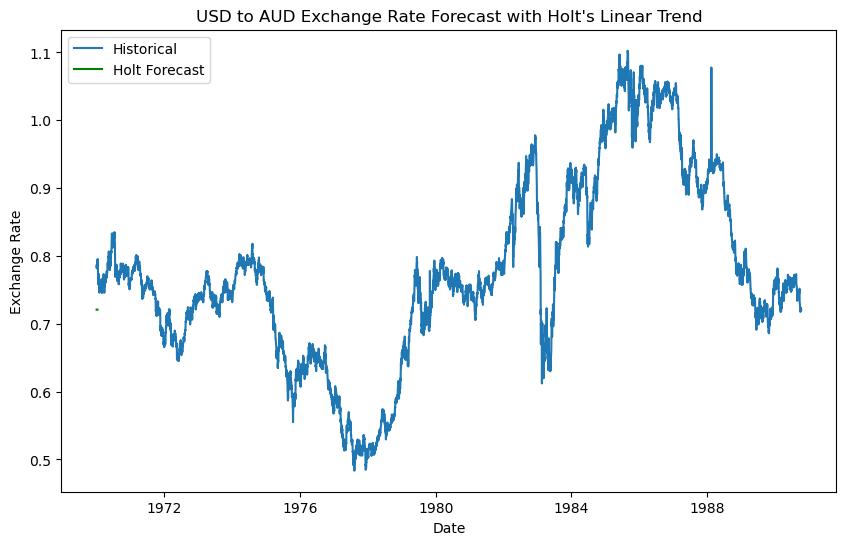

In [163]:
# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical')
plt.plot(forecast_index, forecast_values, label='Holt Forecast', color='green')
plt.title('USD to AUD Exchange Rate Forecast with Holt\'s Linear Trend')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Evaluation and Comparison

In [168]:
#Step 1: Compute Error Metrics

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [176]:
model

In [177]:
model_fit

In [180]:
forecast_steps = 10
forecast_arima = model_fit.get_forecast(steps=forecast_steps)
# Get the forecasted mean values
forecast_values_arima = forecast_arima.predicted_mean

In [181]:
print(forecast_values_arima)

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
Name: predicted_mean, dtype: float64


In [182]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [189]:
model_hw = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit_hw = model_hw.fit()

In [190]:
test_data = df['Ex_rate'][-forecast_steps:]

In [191]:
forecast_steps = 10
forecast_hw = model_fit_hw.forecast(steps=forecast_steps)

forecast_values_hw = forecast_hw
aligned_forecast_arima = forecast_values_arima[:len(test_data)]
aligned_forecast_hw = forecast_values_hw[:len(test_data)]

In [193]:
arima_forecast_values = forecast_values[:forecast_steps]
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100

In [206]:
#error metrics of arima
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}')

ARIMA MAE: 0.001556771200417284, RMSE: 0.0018425706106975357, MAPE: nan


In [197]:
holt_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], holt_forecast)
holt_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], holt_forecast))
holt_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - holt_forecast) / df['Ex_rate'][-forecast_steps:])) * 100

In [201]:
#error metrics:
print(f'Holt MAE: {holt_mae}, RMSE: {holt_rmse}, MAPE: {holt_mape}')

Holt MAE: 0.0015740680074930792, RMSE: 0.0018519616616264546, MAPE: nan


#step 2. Model Comparison: 